### Contents <a class="anchor" id="sections"></a>

- [Part 1. Getting Started](#section1)
- [Part 2. Data Augmentation](#section2)
- [Part 3. Data Clean](#section3)
- [Part 4. Save DataFrame to CSV](#section4)
- [Part 5. EDA](#section5)

### Part 1. Getting Started <a class="anchor" id="section1"></a>

In [1]:
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import praw
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

sns.set()
pd.set_option('display.max_colwidth', None)
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
# User agent
userAgent = "####"

# Reddit client
reddit = praw.Reddit(client_id = "####", client_secret = "####",
                     user_agent = userAgent)

# Subreddit
data = reddit.subreddit('monsterlegends')

# Scrape top posts for current month: March 2022
marchPosts = data.top('month')

In [3]:
# Dictionary (will be the DataFrame)
postDict = {'Title': [], 'ID': [], 'Timestamp': [], 'URL': [],
            'Author':[], 'Upvotes': [], 'Replies': [], 'Link': []}

In [4]:
# Fill dictionary
for post in marchPosts:
    postDict['Title'].append(post.title)
    postDict['ID'].append(post.id)
    postDict['Timestamp'].append(post.created_utc)
    postDict['URL'].append(post.permalink)
    postDict['Author'].append(post.author)
    postDict['Upvotes'].append(post.score)
    postDict['Replies'].append(post.num_comments)
    postDict['Link'].append(post.url)

In [5]:
# Read dictionary as a pandas DataFrame
df=pd.DataFrame(postDict)
df.shape

(100, 8)

In [6]:
df.head(3)

,Title,ID,Timestamp,URL,Author,Upvotes,Replies,Link
0,le smash or pass,tbeaxw,1.646961e+09,/r/MonsterLegends/comments/tbeaxw/le_smash_or_pass/,masked267,111,9,https://v.redd.it/i3na8we4onm81
1,Are they trying to make this game look terrible,t6jg53,1.646402e+09,/r/MonsterLegends/comments/t6jg53/are_they_trying_to_make_this_game_look_terrible/,Superpug22,95,30,https://v.redd.it/uq6au9qpgdl81
2,Missed opportunity for Doomsday era,t5arn4,1.646257e+09,/r/MonsterLegends/comments/t5arn4/missed_opportunity_for_doomsday_era/,Ok_Individual_8395,71,9,https://i.redd.it/8k7vt2x7h1l81.jpg


### Part 2. Data Augmentation <a class="anchor" id="section2"></a>

#### 2-1. Feature: URL

In [7]:
# Add prefix to URL values
df['URL'] = 'https://www.reddit.com' + df['URL'].astype(str)

#### 2-2. Feature: Timestamp

In [8]:
# Convert UTC Timestamp data
df['Timestamp'] = [datetime.fromtimestamp(x) for x in df['Timestamp']]

# Add new columns 
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month
df['Year'] = df['Timestamp'].dt.year
df['Time'] = df['Timestamp'].dt.time

# Drop Timestamp column from DataFrame
df = df.drop('Timestamp', axis=1)

### Part 3. Data Clean <a class="anchor" id="section3"></a>

#### 3-1. DataFrame

In [9]:
# Sort DataFrame
df.sort_values(by=['Month', 'Day', 'Time'], inplace=True)

# Reset index
df.reset_index(drop=True, inplace=True)

# Reorder columns
df = df[['Title', 'URL', 'Author', 'Upvotes', 'Replies', 'Link', 'ID', 'Day', 'Month', 'Time', 'Year']]

df.head()

,Title,URL,Author,Upvotes,Replies,Link,ID,Day,Month,Time,Year
0,You have got to be kidding me 😭,https://www.reddit.com/r/MonsterLegends/comments/ss5u63/you_have_got_to_be_kidding_me/,vikicha123,30,15,https://www.reddit.com/gallery/ss5u63,ss5u63,14,2,09:34:44,2022
1,'SLUMSTER & URIEL' WHO IS BETTER SUPPORT ?,https://www.reddit.com/r/MonsterLegends/comments/ssasqt/slumster_uriel_who_is_better_support/,Pecalele,29,11,https://v.redd.it/pr7lxujfxsh81,ssasqt,14,2,14:36:59,2022
2,It gonna be broken right?,https://www.reddit.com/r/MonsterLegends/comments/ssmna2/it_gonna_be_broken_right/,JTU105,17,17,https://i.redd.it/s3m4gefcfvh81.jpg,ssmna2,14,2,23:00:05,2022
3,I make a dream cry,https://www.reddit.com/r/MonsterLegends/comments/stlopl/i_make_a_dream_cry/,BiggusMcDingus,38,12,https://v.redd.it/7z3b6ewc64i81,stlopl,16,2,04:26:06,2022
4,"Been getting a few of these lately. I should be lucky, but I heard the current multiplayer monster is bad.",https://www.reddit.com/r/MonsterLegends/comments/stmpsi/been_getting_a_few_of_these_lately_i_should_be/,strongestdig7,14,1,https://i.redd.it/w33s32svf4i81.jpg,stmpsi,16,2,05:19:06,2022


### Part 4. Save DataFrame to CSV <a class="anchor" id="section4"></a>

In [10]:
df.to_csv('topPostsMarch2022.csv', header=True, encoding='utf-8', index=False)

### Part 5. EDA <a class="anchor" id="section5"></a>

#### 5-1. EDA March 2022: Posts with the most Upvotes 

In [11]:
# Sort DataFrame 
df.sort_values(by=['Upvotes'], ascending=False, inplace=True)

df[['Title', 'URL']].head(10)

,Title,URL
95,le smash or pass,https://www.reddit.com/r/MonsterLegends/comments/tbeaxw/le_smash_or_pass/
68,Are they trying to make this game look terrible,https://www.reddit.com/r/MonsterLegends/comments/t6jg53/are_they_trying_to_make_this_game_look_terrible/
61,Missed opportunity for Doomsday era,https://www.reddit.com/r/MonsterLegends/comments/t5arn4/missed_opportunity_for_doomsday_era/
26,"Yes $P, I agree to these terms",https://www.reddit.com/r/MonsterLegends/comments/sxddvk/yes_p_i_agree_to_these_terms/
25,"The monsters have gone home. Illuminated by the dim sunlight, the dungeon is silent, waiting for a battle that will never come.",https://www.reddit.com/r/MonsterLegends/comments/sx5wpn/the_monsters_have_gone_home_illuminated_by_the/
67,damn i liked the old art :(,https://www.reddit.com/r/MonsterLegends/comments/t67391/damn_i_liked_the_old_art/
54,I don’t usually make fnaf memes but...,https://www.reddit.com/r/MonsterLegends/comments/t47qsk/i_dont_usually_make_fnaf_memes_but/
49,"Aren't you guys also sick of seeing these kinds of vidoes , they bug me off.",https://www.reddit.com/r/MonsterLegends/comments/t2y9p7/arent_you_guys_also_sick_of_seeing_these_kinds_of/
46,I have been Fighting this guy since 4pm rn it's 1 am and we are still in a multiplayer match. He heals I damage I heal he damages. Like how much more longer do i fight this guy? srsly,https://www.reddit.com/r/MonsterLegends/comments/t1bjvm/i_have_been_fighting_this_guy_since_4pm_rn_its_1/
69,Thoughts on the new trait icons?,https://www.reddit.com/r/MonsterLegends/comments/t6l2nk/thoughts_on_the_new_trait_icons/


#### 5-2. Feature: Author

In [12]:
# Number of unique authors March 2022
df['Author'].nunique()

68

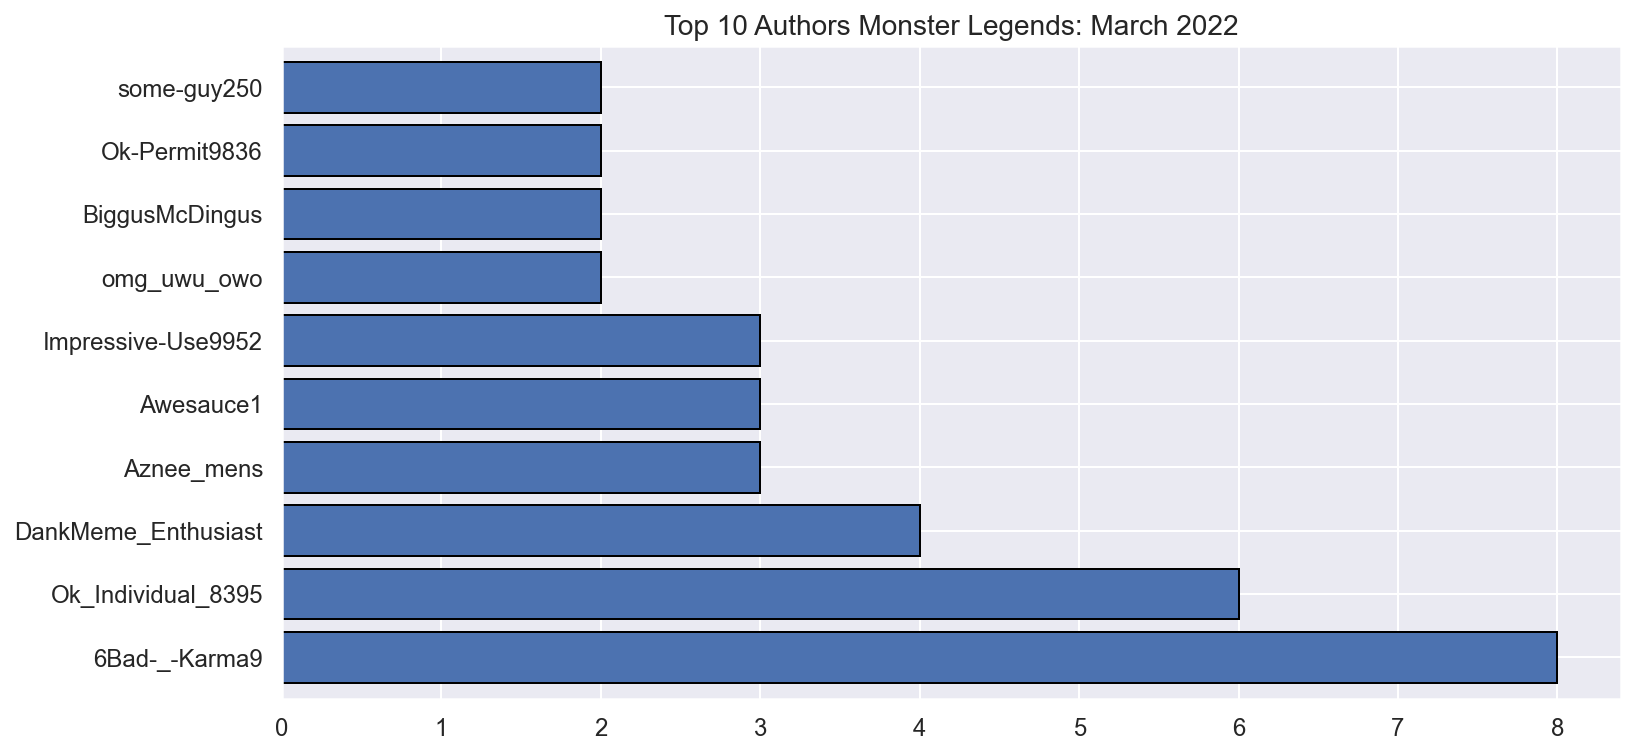

In [13]:
# Plot top 10 authors (number of posts made on subreddit)
df['Author'].value_counts().head(10).plot(kind='barh', ec='black', width=.8)
plt.xticks(fontweight=12, fontsize=12)
plt.yticks(fontweight=12, fontsize=12)
plt.title('Top 10 Authors Monster Legends: March 2022', fontweight=14, fontsize=14)
plt.show()

#### 5-3. Top 3 Authors

In [14]:
# Top 3 Authors
for x in df['Author'].value_counts().head(3).index:
    print(f"\nAuthor ID: {x}")
    display(df[['Title', 'URL']][df['Author'] == x])


Author ID: 6Bad-_-Karma9


,Title,URL
78,Good pull?,https://www.reddit.com/r/MonsterLegends/comments/t8a65s/good_pull/
28,Which one should I get,https://www.reddit.com/r/MonsterLegends/comments/sxlw72/which_one_should_i_get/
89,Are any of these monsters good (not shaded in),https://www.reddit.com/r/MonsterLegends/comments/ta7bdi/are_any_of_these_monsters_good_not_shaded_in/
85,Worth it?,https://www.reddit.com/r/MonsterLegends/comments/t974i1/worth_it/
64,This dudes good right?,https://www.reddit.com/r/MonsterLegends/comments/t5jaeh/this_dudes_good_right/
27,Please tell me he’s actually good,https://www.reddit.com/r/MonsterLegends/comments/sxijth/please_tell_me_hes_actually_good/
42,Anyone know what this means,https://www.reddit.com/r/MonsterLegends/comments/t0ugbp/anyone_know_what_this_means/
86,Should I buy any of creators? I only have mr beast,https://www.reddit.com/r/MonsterLegends/comments/t9l8xw/should_i_buy_any_of_creators_i_only_have_mr_beast/



Author ID: Ok_Individual_8395


,Title,URL
61,Missed opportunity for Doomsday era,https://www.reddit.com/r/MonsterLegends/comments/t5arn4/missed_opportunity_for_doomsday_era/
56,Wait a minute..,https://www.reddit.com/r/MonsterLegends/comments/t4yyam/wait_a_minute/
63,Cherub or Elfeera be like:,https://www.reddit.com/r/MonsterLegends/comments/t5bmoz/cherub_or_elfeera_be_like/
16,"Ah yes, T E T S U M A N",https://www.reddit.com/r/MonsterLegends/comments/svpv72/ah_yes_t_e_t_s_u_m_a_n/
55,New elemental weakness system is already in the game,https://www.reddit.com/r/MonsterLegends/comments/t4w47l/new_elemental_weakness_system_is_already_in_the/
60,I need this,https://www.reddit.com/r/MonsterLegends/comments/t5a9ve/i_need_this/



Author ID: DankMeme_Enthusiast


,Title,URL
38,When is there a discount on runes?,https://www.reddit.com/r/MonsterLegends/comments/sz6tcs/when_is_there_a_discount_on_runes/
75,First time beat the rusd,https://www.reddit.com/r/MonsterLegends/comments/t7rgqf/first_time_beat_the_rusd/
62,Any tips on beating him?,https://www.reddit.com/r/MonsterLegends/comments/t5bbdp/any_tips_on_beating_him/
92,I have the most powerful pandaken!!!,https://www.reddit.com/r/MonsterLegends/comments/tanj26/i_have_the_most_powerful_pandaken/


[Return to contents](#sections)